### 1. Reset the reference channel / threshold
1. Run the codes below to reset reference and threshold
2. Proceed to the next section

* **Restart the kernel when you move on to the next section**

Channel reference ordered by channel:
  0- 16:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 16- 32:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 32- 48:  38  38  38  38  38  38 160  38  38  38  38  38  38  38  38  38
 48- 64:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 64- 80: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
 80- 96: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
 96-112: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
112-128: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
128-144: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
144-160: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
Channel reference ordered by probe location:
  0- 16:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 16- 32:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 32- 48:  38  38 160  38  38  38  38  38 

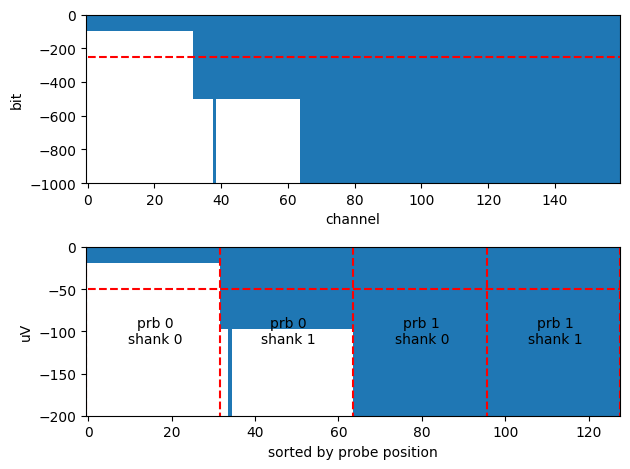

In [1]:
%matplotlib inline
%gui qt

import numpy as np
import matplotlib.pyplot as plt
from spiketag.base import probe
from spiketag.fpga import FPGA

# load probe
prb_filename = './prb_a2x32x2.prb'
prb = probe()
prb.load(prb_filename)

fpga = FPGA(probe=prb)

# check the current channel reference
ch_ref_fpga = fpga.ch_ref.to_numpy().astype(int)
print(f"Channel reference ordered by channel:")
for i in range(10):
    ch_str = ' '.join([f"{i:3d}" for i in ch_ref_fpga[i*16:(i+1)*16]])
    print(f"{i*16:3d}-{(i+1)*16:3d}: " + ch_str)
print(f"Channel reference ordered by probe location:")
for i in range(10):
    ch_str = ' '.join([f"{i:3d}" for i in ch_ref_fpga[prb.chs[i*16:(i+1)*16]]])
    print(f"{i*16:3d}-{(i+1)*16:3d}: " + ch_str)

# check the current threshold
thres = fpga.thres.to_numpy().copy()
plt.subplot(2, 1, 1)
plt.bar(np.arange(len(thres)), thres, width=1)
plt.hlines(-250, 0, len(thres), color='r', linestyles='dashed')
plt.ylabel('bit')
plt.xlabel('channel')
plt.xlim([-0.5, len(thres) - 0.5])
plt.ylim([-1000, 0])
plt.subplot(2, 1, 2)
plt.bar(np.arange(len(prb.chs)), thres[prb.chs] * 0.195, width=1)
plt.hlines(-50, 0, len(prb.chs), color='r', linestyles='dashed')
plt.vlines(np.arange(-0.5, 128, 32), 0, -200, color='r', linestyles='dashed')
plt.text(16, -100, 'prb 0\nshank 0', color='k', ha='center', va='center')
plt.text(16+32, -100, 'prb 0\nshank 1', color='k', ha='center', va='center')
plt.text(16+64, -100, 'prb 1\nshank 0', color='k', ha='center', va='center')
plt.text(16+96, -100, 'prb 1\nshank 1', color='k', ha='center', va='center')
plt.ylabel('uV')
plt.xlabel('sorted by probe position')
plt.xlim([-0.5, len(prb.chs) - 0.5])
plt.ylim([-200, 0])
plt.tight_layout()

print(thres[prb.chs])

In [1]:
# probe channel information
probe0_shank0 = prb.chs[:32]
probe0_shank1 = prb.chs[32:64]
probe1_shank0 = prb.chs[64:96]
probe1_shank1 = prb.chs[96:128]

# reset reference channel
ch_ref_array = np.array(160*[160])

# reset threshold level
thres = np.ones(160) * -20000.0
thres[probe0_shank0] = -200.0
thres[probe0_shank1] = -200.0
thres[probe1_shank0] = -20000.0
thres[probe1_shank1] = -20000.0

fpga.set_channel_ref(ch_ref_array)
fpga.set_threshold(thres)

### 2. Select reference electrodes
1. Record for 1 minute (using open-ephys)
2. Run the following command to check the spike count per channel. **Choose silent channels** as the references per probe:
```bash
> spiketag report mua.bin spk.bin prb_a2x32x2.prb
```

3. Set the reference channel
4. Remove bin files (`rm *.bin`)
5. Proceed to the next section


In [2]:
%matplotlib inline
%gui qt

import numpy as np
from spiketag.mvc import controller
from spiketag.base import probe

mua_filename = './mua.bin'
spk_filename = './spk.bin'
prb_filename = './prb_a2x32x2.prb'

# load probe
prb = probe()
prb.load(prb_filename)
probe0_shank0 = prb.chs[:32]
probe0_shank1 = prb.chs[32:64]
probe1_shank0 = prb.chs[64:96]
probe1_shank1 = prb.chs[96:128]

# load fpga
ctrl = controller(
                  fpga = True,
                  probe = prb,
                  mua_filename=mua_filename, 
                  spk_filename=spk_filename, 
                 )

# set reference channel
ch_ref_array = np.array(160*[160])

ref_probe0_shank0 = 38 # change this value
ref_probe0_shank1 = 38 # change this value
ref_probe1_shank0 = 160 # change this value
ref_probe1_shank1 = 160 # change this value

ch_ref_array[probe0_shank0] = ref_probe0_shank0
ch_ref_array[probe0_shank1] = ref_probe0_shank1
ch_ref_array[probe1_shank0] = ref_probe1_shank0
ch_ref_array[probe1_shank1] = ref_probe1_shank1

if ref_probe0_shank0 < 160:
    ch_ref_array[ref_probe0_shank0] = 160
if ref_probe0_shank1 < 160:
    ch_ref_array[ref_probe0_shank1] = 160
if ref_probe1_shank0 < 160:
    ch_ref_array[ref_probe1_shank0] = 160
if ref_probe1_shank0 < 160:
    ch_ref_array[ref_probe1_shank1] = 160

ctrl.fpga.set_channel_ref(ch_ref_array)
ch_ref_fpga = ctrl.fpga.ch_ref.to_numpy().astype(int)
print(f"Channel reference ordered by channel:")
for i in range(10):
    ch_str = ' '.join([f"{i:3d}" for i in ch_ref_fpga[i*16:(i+1)*16]])
    print(f"{i*16:3d}-{(i+1)*16:3d}: " + ch_str)
print(f"Channel reference ordered by probe location:")
for i in range(10):
    ch_str = ' '.join([f"{i:3d}" for i in ch_ref_fpga[prb.chs[i*16:(i+1)*16]]])
    print(f"{i*16:3d}-{(i+1)*16:3d}: " + ch_str)

2024-08-30 16:27:54,889 - spiketag - INFO - load mua data
2024-08-30 16:27:54,892 - spiketag - INFO - #############  load data  ###################
2024-08-30 16:27:54,893 - spiketag - INFO - ./mua.bin loaded, it contains: 
2024-08-30 16:27:54,894 - spiketag - INFO - 59913.0 * 160 points (38344320 bytes) 
2024-08-30 16:27:54,895 - spiketag - INFO - 160 channels with sampling rate of 25000.0000 
2024-08-30 16:27:54,896 - spiketag - INFO - 2.397 secs (0.040 mins) of data
2024-08-30 16:27:54,897 - spiketag - INFO - #############################################
2024-08-30 16:27:54,900 - spiketag - INFO - processing folder: ./
2024-08-30 16:27:54,902 - spiketag - INFO - raw data have 48 spks
2024-08-30 16:27:54,903 - spiketag - INFO - ----------------success------------------
2024-08-30 16:27:54,904 - spiketag - INFO -  
2024-08-30 16:27:54,905 - spiketag - INFO - extract spikes from pivital meta data
2024-08-30 16:27:54,912 - spiketag - INFO - extract features with pca
QLayout: Attempting 

Channel reference ordered by channel:
  0- 16:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 16- 32:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 32- 48:  38  38  38  38  38  38 160  38  38  38  38  38  38  38  38  38
 48- 64:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 64- 80: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
 80- 96: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
 96-112: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
112-128: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
128-144: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
144-160: 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
Channel reference ordered by probe location:
  0- 16:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 16- 32:  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
 32- 48:  38  38 160  38  38  38  38  38 

### 3. Set threshold
1. Record for 1 minute
2. Set threshold
3. Remove bin files
4. Record about 10 minutes for clustering
5. Copy `sorter-fpga.ipynb` by running this:
```bash
> spiketag cp sorter-fpga
```

In [1]:
%matplotlib inline
%gui qt

import numpy as np
import matplotlib.pyplot as plt
from spiketag.mvc import controller
from spiketag.base import probe

mua_filename = './mua.bin'
spk_filename = './spk.bin'
prb_filename = './prb_a2x32x2.prb'

# load probe
prb = probe()
prb.load(prb_filename)
probe0_shank0 = prb.chs[:32]
probe0_shank1 = prb.chs[32:64]
probe1_shank0 = prb.chs[64:96]
probe1_shank1 = prb.chs[96:128]

# load fpga
ctrl = controller(
                  fpga = True,
                  probe = prb,
                  mua_filename=mua_filename, 
                  spk_filename=spk_filename, 
                  scale=False
                 )

# set threshold
ctrl.set_threshold(beta=4.5)

# if the reference is 160, we will turn it off.
ch_ref = ctrl.fpga.ch_ref.to_numpy().astype(int)
for i_ch, ch in enumerate(ch_ref):
    if ch == 160:
        ctrl.fpga.thres[i_ch] = -20000.

2024-08-30 17:20:47,378 - spiketag - INFO - load mua data
2024-08-30 17:20:47,556 - spiketag - INFO - #############  load data  ###################
2024-08-30 17:20:47,557 - spiketag - INFO - ./mua.bin loaded, it contains: 
2024-08-30 17:20:47,557 - spiketag - INFO - 349429.0 * 160 points (223634560 bytes) 
2024-08-30 17:20:47,558 - spiketag - INFO - 160 channels with sampling rate of 25000.0000 
2024-08-30 17:20:47,559 - spiketag - INFO - 13.977 secs (0.233 mins) of data
2024-08-30 17:20:47,559 - spiketag - INFO - #############################################
2024-08-30 17:20:47,560 - spiketag - INFO - processing folder: ./
2024-08-30 17:20:47,562 - spiketag - INFO - raw data have 244 spks
2024-08-30 17:20:47,563 - spiketag - INFO - ----------------success------------------
2024-08-30 17:20:47,564 - spiketag - INFO -  
2024-08-30 17:20:47,565 - spiketag - INFO - extract spikes from pivital meta data
2024-08-30 17:20:47,572 - spiketag - INFO - extract features with pca
QLayout: Attempt

array([  -141.48657227,   -121.4440918 ,   -120.30554199,   -120.76318359,
         -118.53662109,   -119.22888184,   -120.52868652,   -121.3137207 ,
         -119.30383301,   -119.18493652,   -119.85766602,   -118.09033203,
         -120.15893555,   -117.71081543,   -120.12634277,   -120.46191406,
         -119.46826172,   -119.81848145,   -118.80541992,   -118.27929688,
         -119.38684082,   -119.96679688,   -120.06774902,   -119.10510254,
         -120.29736328,   -118.71252441,   -119.41943359,   -118.73046875,
         -119.26635742,   -118.78100586,   -117.81176758,   -117.40466309,
         -118.70117188,   -117.49914551, -20000.        ,   -118.1229248 ,
         -119.15075684,   -117.39489746,   -119.27453613,   -118.6295166 ,
         -118.30529785,   -118.72888184,   -120.06933594,   -119.98461914,
         -119.18981934,   -119.19299316,   -118.57897949,   -119.80224609,
         -119.10351562,   -121.78125   ,   -119.07250977,   -119.4666748 ,
         -119.13928223,  

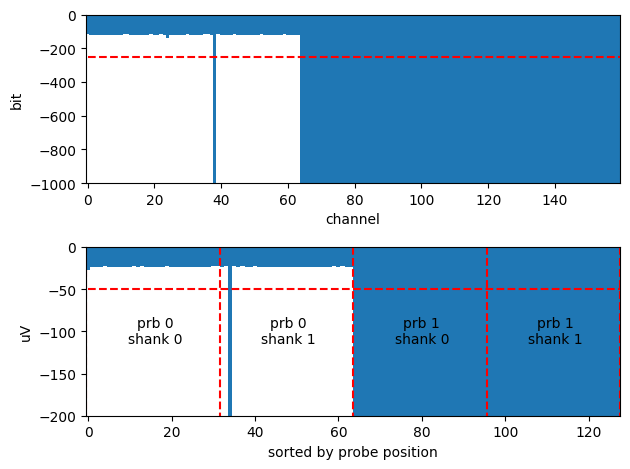

In [2]:
# plot threshold
import matplotlib.pyplot as plt

thres = ctrl.fpga.thres.to_numpy().copy()

plt.subplot(2, 1, 1)
plt.bar(np.arange(len(thres)), thres, width=1)
plt.hlines(-250, 0, len(thres), color='r', linestyles='dashed')
plt.ylabel('bit')
plt.xlabel('channel')
plt.xlim([-0.5, len(thres) - 0.5])
plt.ylim([-1000, 0])

plt.subplot(2, 1, 2)
plt.bar(np.arange(len(prb.chs)), thres[prb.chs] * 0.195, width=1)
plt.hlines(-50, 0, len(prb.chs), color='r', linestyles='dashed')
plt.vlines(np.arange(-0.5, 128, 32), 0, -200, color='r', linestyles='dashed')
plt.text(16, -100, 'prb 0\nshank 0', color='k', ha='center', va='center')
plt.text(16+32, -100, 'prb 0\nshank 1', color='k', ha='center', va='center')
plt.text(16+64, -100, 'prb 1\nshank 0', color='k', ha='center', va='center')
plt.text(16+96, -100, 'prb 1\nshank 1', color='k', ha='center', va='center')
plt.ylabel('uV')
plt.xlabel('sorted by probe position')
plt.xlim([-0.5, len(prb.chs) - 0.5])
plt.ylim([-200, 0])

plt.tight_layout()

thres[prb.chs]

In [4]:
# manually set threshold if needed (these values are in bits not in uV)
thres = np.ones(160, dtype=float) * -20000.0
thres[probe0_shank0] = -10.0
thres[probe0_shank1] = -500.0

# if the reference is 160, we will turn it off.
ch_ref = ctrl.fpga.ch_ref.to_numpy().astype(int)
for i_ch, ch in enumerate(ch_ref):
    if ch == 160:
        thres[i_ch] = -20000.0

ctrl.fpga.set_threshold(thres)
print(thres)

[-1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01
 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01
 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01
 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -1.e+01 -5.e+02 -5.e+02 -5.e+02 -5.e+02
 -5.e+02 -5.e+02 -2.e+04 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02
 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02
 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02 -5.e+02
 -5.e+02 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04
 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04
 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04
 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04
 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04
 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04
 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2.e+04 -2

### 4. Spike sort
#### 1) Run background cluster
```bash
> ipcluster start --n=8
```
- You don't need this if you are doing only manual curation

#### 2) Open sorter
```python
>>> ctrl.show()
```

- Group selection plot
	- k, j: up, down
	- o: open
	- #g: go to cluster #
	- #bg: do gaussian clustering for the selected group (ex. 4bg, 5bg ...)
	- #bh: do hdbscan clustering for the selected group
	- z: undo
	- u: reset
	- d: done
- Waveform plot
	- c: select single spike
	- a: select all
	- left click: merge
	- right click: switch
	- esc: cancel selection

In [5]:
%matplotlib inline
%gui qt

import os

from spiketag.mvc.Control import controller
from spiketag.base import probe

mua_filename = './mua.bin'
spk_filename = './spk.bin'
prb_filename = './prb_a2x32x2.prb'

prb = probe()
prb.load(prb_filename)
ctrl = controller(
                  fpga = True,
                  probe = prb,
                  mua_filename=mua_filename, 
                  spk_filename=spk_filename,
                  binary_radix=13, 
                  scale=False
                  # time_segs=[[0,320]] # if you want to load only part of the data
                 )

2024-08-30 17:22:07,097 - spiketag - INFO - load mua data
2024-08-30 17:22:07,101 - spiketag - INFO - #############  load data  ###################
2024-08-30 17:22:07,103 - spiketag - INFO - ./mua.bin loaded, it contains: 
2024-08-30 17:22:07,104 - spiketag - INFO - 174416.0 * 160 points (111626240 bytes) 
2024-08-30 17:22:07,105 - spiketag - INFO - 160 channels with sampling rate of 25000.0000 
2024-08-30 17:22:07,106 - spiketag - INFO - 6.977 secs (0.116 mins) of data
2024-08-30 17:22:07,107 - spiketag - INFO - #############################################
2024-08-30 17:22:07,108 - spiketag - INFO - processing folder: ./
2024-08-30 17:22:07,129 - spiketag - INFO - raw data have 109639 spks
2024-08-30 17:22:07,131 - spiketag - INFO - ----------------success------------------
2024-08-30 17:22:07,132 - spiketag - INFO -  
2024-08-30 17:22:07,133 - spiketag - INFO - extract spikes from pivital meta data
2024-08-30 17:22:07,501 - spiketag - INFO - extract features with pca


In [6]:
# Open the sorter GUI
ctrl.show()

In [7]:
# Save the model
ctrl.save('model')

2024-08-30 17:22:42,558 - spiketag - INFO - Model.spktag is generated, nspk:71538


In [8]:
# Copy model to FPGA
ctrl.compile()

100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
2024-08-30 17:22:49,346 - spiketag - INFO - group 0: accuracy:0.9291835814163284
100%|██████████| 2/2 [00:01<00:00,  1.89it/s]
2024-08-30 17:22:50,795 - spiketag - INFO - group 1: accuracy:0.9518984522881639
compile to fpga: 100%|██████████| 2/2 [00:00<00:00, 28.34it/s]


FPGA is compiled
3 units has been configured in the FPGA-NSP


In [9]:
print(ctrl.fpga.label)

group 0 labels: [0, 1, 2]
group 1 labels: [0, 3]
group 2 labels: [0]
group 3 labels: [0]
group 4 labels: [0]
group 5 labels: [0]
group 6 labels: [0]
group 7 labels: [0]
group 8 labels: [0]
group 9 labels: [0]
group 10 labels: [0]
group 11 labels: [0]
group 12 labels: [0]
group 13 labels: [0]
group 14 labels: [0]
group 15 labels: [0]
group 16 labels: [0]
group 17 labels: [0]
group 18 labels: [0]
group 19 labels: [0]
group 20 labels: [0]
group 21 labels: [0]
group 22 labels: [0]
group 23 labels: [0]
group 24 labels: [0]
group 25 labels: [0]
group 26 labels: [0]
group 27 labels: [0]
group 28 labels: [0]
group 29 labels: [0]
group 30 labels: [0]
group 31 labels: [0]
group 32 labels: [0]
group 33 labels: [0]
group 34 labels: [0]
group 35 labels: [0]
group 36 labels: [0]
group 37 labels: [0]
group 38 labels: [0]
group 39 labels: [0]



In [10]:
# Set the unit to trigger TTL
ctrl.fpga.target_unit = 2

### 5. Check clustered units to select target unit
- Check the pattern of each unit, and select the one that is stable, and well separated from the noise level

In [8]:
from nctrl.unit import Unit

unit = Unit()
unit.load()

Unit 1: Mean=4.60Hz, Median=4.50Hz, 80th=6.00Hz, 90th=7.00Hz
Unit 2: Mean=0.97Hz, Median=1.00Hz, 80th=2.00Hz, 90th=2.00Hz


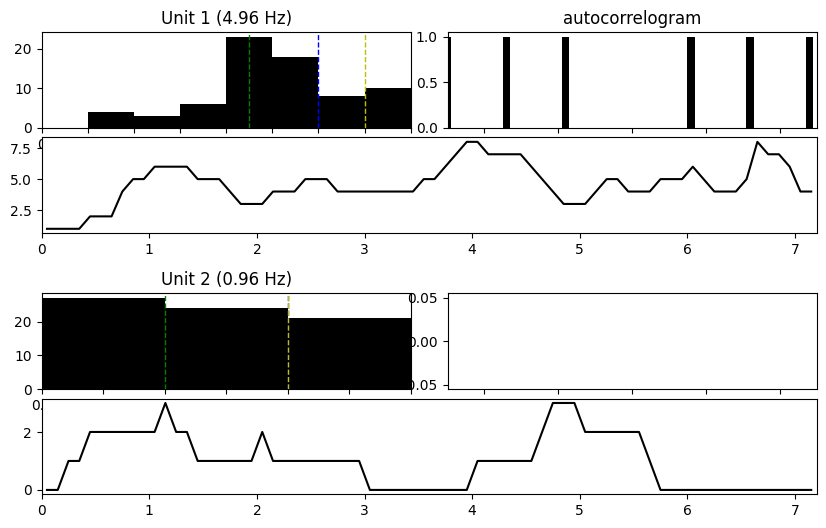

In [9]:
unit.plot()

In [78]:
unit.simulate(unit_id=1)

interactive(children=(SelectionSlider(description='Bin size (s)', index=4, options=(4e-05, 0.0004, 0.001, 0.01…

### 6. BMI
#### 1) If you are using FPGA's TTL output, go to section #4 and run
```python
>>> ctrl.fpga.target_unit = 1
```

Then open spiketag bmi
```bash
> spiketag bmi
```

#### 2) If you are using software close-loop system, run the section below.

In [1]:
from nctrl import NCtrl

bmi = NCtrl()
bmi.show()

[2024-08-30 16:36:46.299] Loading probe file prb_a2x32x2.prb
[2024-08-30 16:36:46.301] Loading BMI
32 groups on probe
4 groups is configured in the FPGA: [0 1 2 3]
7 neurons are configured in the FPGA
---1. BMI spike-model initiation succeed---

spike-id packet channel is opened

spike-id and feature is saved to ./fet.bin

[2024-08-30 16:36:48.226] Setting output to Laser on port /dev/ttyACM0
[2024-08-30 16:36:48.337] nctrl.output.Laser.set_duration: Setting duration to 5 ms
[2024-08-30 16:36:49.340] nctrl.output.Laser.from_serial: Laser duration is set to 5 ms
[2024-08-30 16:37:00.822] nctrl.output.Laser.on: Laser on
[2024-08-30 16:37:00.824] nctrl.output.Laser.from_serial: Laser enabled
BMI binner: 10 bins 7 units, each bin is 0.1 seconds
---2. BMI binner initiation succeed---

[2024-08-30 16:37:00.825] Setting unit_id to 1
[2024-08-30 16:37:00.825] Setting nspike to 1
---3. BMI Decoder initiation succeed---

[2024-08-30 16:37:00.848] nctrl.output.Laser.on: Laser on
[2024-08-30 16:37

Process fpga:
Process fpga:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/nclab/anaconda3/envs/spiketag/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nclab/anaconda3/envs/spiketag/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/nclab/anaconda3/envs/spiketag/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/nclab/anaconda3/envs/spiketag/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/nclab/anaconda3/envs/spiketag/lib/python3.8/site-packages/spiketag/realtime/BMI.py", line 240, in BMI_core_func
    self.binner.input(bmi_output)
  File "/home/nclab/anaconda3/envs/spiketag/lib/python3.8/site-packages/spiketag/realtime/BMI.py", line 240, in BMI_core_func
    self.binner.input(bmi_output)
  File "/home/nclab/anaconda3/

[2024-08-30 16:37:32.031] nctrl.output.Laser.off: Laser off
[2024-08-30 16:37:32.033] nctrl.output.Laser.from_serial: Laser disabled
[2024-08-30 16:37:33.425] nctrl.output.Laser.close: Laser closed


### If the device is busy...
```bash
> fuser /dev/xillybus_template_32 -k
> fuser /dev/xillybus_fet_clf_32 -k
```

In [2]:
# if the device is busy
!fuser /dev/xillybus_template_32 -k
!fuser /dev/xillybus_fet_clf_32 -k